In [576]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [577]:
# Hyper parameters
test_size = 0.2
validation_size = 0.1
layers = (32, 8)
Lambda = 1e-05
batch_size = 64
initial_learning_rate = 0.01
epochs = 500

In [578]:
# Reading the timesere dataset
#14010	14032	14045	14061	14003	14031	14051	14063

df = pd.read_csv('8speed.csv')['14003'][1:-1]
df = df.replace(0, np.nan)
df = df.dropna()

In [579]:
print(df.shape)
df

(113197,)


1         79.50
2         92.71
3         87.63
4         89.25
5         92.67
          ...  
125274    92.95
125275    91.51
125276    81.61
125277    91.43
125278    95.28
Name: 14003, Length: 113197, dtype: float64

In [580]:
df = np.array([df[i:i + 45] for i in range(len(df) - 44)])

# Getting the input/output
X = df[:, :-1]
Y = df[:, -1:]



# Split data into Train/Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=1)

# Normalizing the data
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

scaler_y = StandardScaler().fit(Y_train)
Y_train_sc = scaler_y.transform(Y_train)
Y_test_sc = scaler_y.transform(Y_test)

In [581]:
# Initializing the regressor model
regressor = MLPRegressor(
        hidden_layer_sizes=layers,
        activation='logistic',
        solver='adam',
        alpha=Lambda,
        batch_size=batch_size,
        learning_rate='adaptive',
        learning_rate_init=initial_learning_rate,
        max_iter=epochs,
        shuffle=True,
        tol=0.0001,
        verbose=False,
        early_stopping=True,
        validation_fraction=validation_size)

In [582]:
# Train the regressor
avg_score = 0
avg_error = 0
min_error = 1
max_error = 0
avg_conv_iter = 0
for i in range(1) :
    print("iteration: ", i)
    regressor.fit(X_train_sc, Y_train_sc.ravel()) 
    avg_score += regressor.best_validation_score_
    avg_conv_iter += regressor.n_iter_
    cur_error = 1 - regressor.best_validation_score_
    avg_error += cur_error
    min_error = min(cur_error, min_error)
    max_error = max(cur_error, max_error)
    print("Done iteration", i)

iteration:  0
Done iteration 0


In [583]:
avg_score /= 10
avg_error /= 10
avg_conv_iter /= 10

print('avg_score    :', round(avg_score, 2))
print('avg_error    :', round(avg_error, 2))
print('max_error    :', round(max_error, 2))
print('min_error    :', round(min_error, 2))
print('avg_conv_iter:', round(avg_conv_iter, 2))
print('Regressor Score:', regressor.score(X_test_sc, Y_test_sc))



avg_score    : 0.09
avg_error    : 0.01
max_error    : 0.1
min_error    : 0.1
avg_conv_iter: 2.3
Regressor Score: 0.9039170269307905


<class 'numpy.ndarray'>


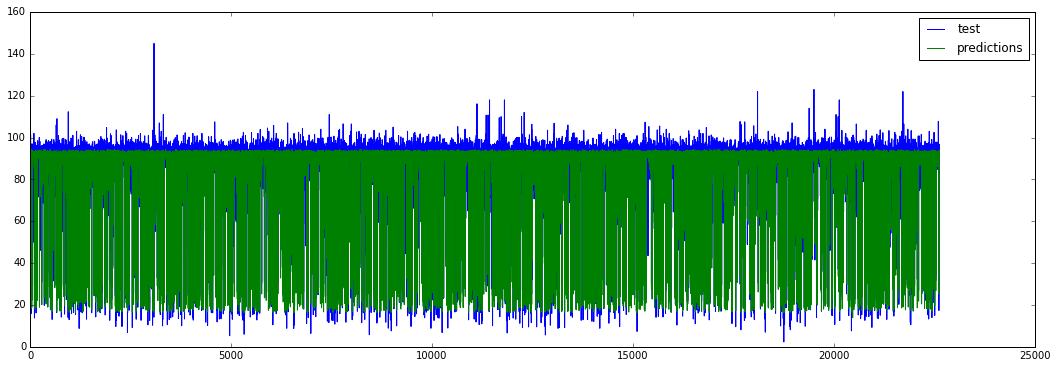

In [584]:
import numpy as np
import pandas as pd

Y_pred_sc = regressor.predict(X_test_sc)
Y_pred_real = scaler_y.inverse_transform(Y_pred_sc)

print(type(Y_pred_real))

fig, ax = plt.subplots(figsize=(18, 6))
Y_test1 = pd.DataFrame(Y_test)
Y_pred_real1 = pd.DataFrame(Y_pred_real)

ax.plot(Y_test1, label='test')
ax.plot(Y_pred_real1, label='predictions')
ax.legend();